1. Business Understanding
2. Data Mining
3. Data Cleaning
4. Data Exploration
5. Feature Engineering
6. Predictive Modelling
7. Data Visualization

## Business Understanding

Automobile dataset, to find the predicted Mileage from the vehicle specification.

### Data Mining

Import the required libraries, dataset, and make research/study of the data

In [115]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Dataset
car=pd.read_csv("/home/shyam/Documents/datasets/cars.csv")

In [117]:
car.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [118]:
car.shape  # Rows,columns

(32, 12)

### Data Cleaning

To check any missing information in the data

In [119]:
car.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [120]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_model  32 non-null     object 
 1   mpg        32 non-null     float64
 2   cyl        32 non-null     int64  
 3   disp       32 non-null     float64
 4   hp         32 non-null     int64  
 5   drat       32 non-null     float64
 6   wt         32 non-null     float64
 7   qsec       32 non-null     float64
 8   vs         32 non-null     int64  
 9   am         32 non-null     int64  
 10  gear       32 non-null     int64  
 11  carb       32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


### Exploratory Data Analysis(EDA)

In [121]:
car.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [122]:
car['am'].unique()

array([1, 0])

In [123]:
car['am'].value_counts()

0    19
1    13
Name: am, dtype: int64

In [124]:
car.groupby(['am','vs']).size()

am  vs
0   0     12
    1      7
1   0      6
    1      7
dtype: int64

In [125]:
car.groupby(['am','gear']).size()

am  gear
0   3       15
    4        4
1   4        8
    5        5
dtype: int64

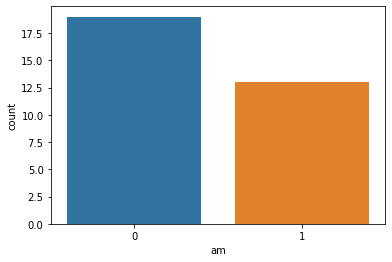

In [126]:
sns.countplot(x='am',data=car);

In [127]:
car.columns

Index(['car_model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [128]:
car['mpg'].min()

10.4

In [129]:
car[car['mpg']==car['mpg'].min()]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4


In [130]:
car[car['mpg']==car['mpg'].max()]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [131]:
car[(car['mpg']>=10.4)&(car['mpg']<=15)]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8


In [132]:
len(car[(car['mpg']>=16)&(car['mpg']<=20)])

8

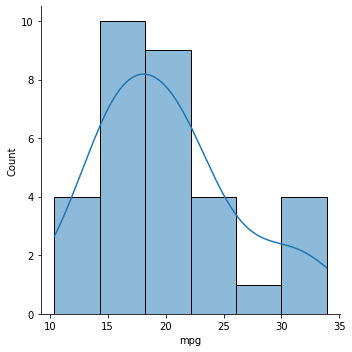

In [133]:
sns.displot(car['mpg'],kde=True);

In [134]:
car['mpg'].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

In [135]:
car['mpg'].skew()  # moderately right skewed
# 0.5 to 1

0.6723771376290805

In [136]:
car.corr()   # correlation

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


Multicollinearity, similar range correlated values <0.05, any one column will be considered.

## Feature Engineering

In [137]:
# Independent variables
X=car.loc[:,['wt','drat','hp','qsec','am','gear','carb']]
# Dependent variable
y=car.loc[:,'mpg']

In [138]:
X

,wt,drat,hp,qsec,am,gear,carb
0,2.620,3.90,110,16.46,1,4,4
1,2.875,3.90,110,17.02,1,4,4
2,2.320,3.85,93,18.61,1,4,1
3,3.215,3.08,110,19.44,0,3,1
4,3.440,3.15,175,17.02,0,3,2
5,3.460,2.76,105,20.22,0,3,1
6,3.570,3.21,245,15.84,0,3,4
7,3.190,3.69,62,20.00,0,4,2
8,3.150,3.92,95,22.90,0,4,2
9,3.440,3.92,123,18.30,0,4,4


In [139]:
y

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [140]:
car.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [141]:
car['cyl'].unique()

array([6, 4, 8])

### Predictive Modelling

In [142]:
# training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=12)

In [143]:
X_train

,wt,drat,hp,qsec,am,gear,carb
21,3.520,2.76,150,16.87,0,3,2
8,3.150,3.92,95,22.90,0,4,2
19,1.835,4.22,65,19.90,1,4,1
0,2.620,3.90,110,16.46,1,4,4
10,3.440,3.92,123,18.90,0,4,4
29,2.770,3.62,175,15.50,1,5,6
31,2.780,4.11,109,18.60,1,4,2
30,3.570,3.54,335,14.60,1,5,8
13,3.780,3.07,180,18.00,0,3,3
5,3.460,2.76,105,20.22,0,3,1


In [144]:
X_train.shape

(22, 7)

In [145]:
X_test.shape

(10, 7)

In [146]:
X_train

,wt,drat,hp,qsec,am,gear,carb
21,3.520,2.76,150,16.87,0,3,2
8,3.150,3.92,95,22.90,0,4,2
19,1.835,4.22,65,19.90,1,4,1
0,2.620,3.90,110,16.46,1,4,4
10,3.440,3.92,123,18.90,0,4,4
29,2.770,3.62,175,15.50,1,5,6
31,2.780,4.11,109,18.60,1,4,2
30,3.570,3.54,335,14.60,1,5,8
13,3.780,3.07,180,18.00,0,3,3
5,3.460,2.76,105,20.22,0,3,1


In [147]:
# Building the Model
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
# training process, using fit function
model_lr.fit(X_train,y_train)

LinearRegression()

In [148]:
# slope
model_lr.coef_

array([-2.43065866,  0.15981262, -0.00982942,  0.97273383,  4.77398817,
        0.14983296, -0.40112905])

In [149]:
# intercept
model_lr.intercept_

9.796549565286785

In [150]:
X_test

,wt,drat,hp,qsec,am,gear,carb
7,3.190,3.69,62,20.00,0,4,2
24,3.845,3.08,175,17.05,0,3,2
18,1.615,4.93,52,18.52,1,4,2
14,5.250,2.93,205,17.98,0,3,4
1,2.875,3.90,110,17.02,1,4,4
23,3.840,3.73,245,15.41,0,3,4
4,3.440,3.15,175,17.02,0,3,2
15,5.424,3.00,215,17.82,0,3,4
25,1.935,4.08,66,18.90,1,4,1
9,3.440,3.92,123,18.30,0,4,4


In [151]:
# Predicting the mileage values from X_test
y_pred=model_lr.predict(X_test)
y_pred

array([21.27478348, 15.45509442, 28.7338748 , 11.82354894, 22.67517282,
       12.48552511, 16.42151604, 11.15786963, 28.45337936, 17.64837564])

In [152]:
y_test   # Actual mileage data, 30 percent data

7     24.4
24    19.2
18    30.4
14    10.4
1     21.0
23    13.3
4     18.7
15    10.4
25    27.3
9     19.2
Name: mpg, dtype: float64

In [153]:
from sklearn.metrics import mean_squared_error,r2_score

In [155]:
mean_squared_error(y_test,y_pred)  # error average

4.1567011826129825

In [157]:
r2_score(y_test,y_pred)  # regression score
# Coefficient of determination

0.8987999449138756

In [160]:
car.shape

(31, 12)

In [39]:
# Detecting the outliers

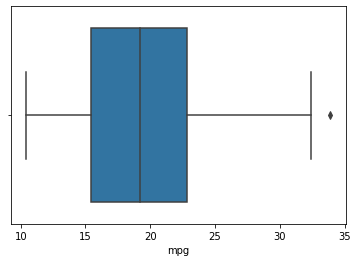

In [113]:
sns.boxplot(x=car['mpg']);

In [114]:
Q1=car['mpg'].quantile(0.25)
Q3=car['mpg'].quantile(0.75)

In [45]:
print(Q1,Q3)

15.425 22.8


In [46]:
# Interquartile range
IQR=Q3-Q1
IQR

7.375

In [51]:
L=Q1-1.5*IQR
L  # Lower limit

4.362500000000001

In [55]:
U=Q3+1.5*IQR
U   # Beyond upper fence

33.8625

In [54]:
car[car['mpg']<L]  # checking 

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb


In [56]:
car[car['mpg']>U]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [58]:
ind=car[car['mpg']>U].index
ind

Int64Index([19], dtype='int64')

In [59]:
car.drop(ind,axis=0,inplace=True)

In [61]:
car.shape

(31, 12)

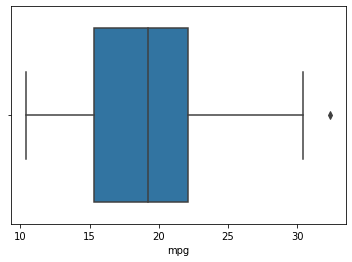

In [62]:
sns.boxplot(x=car['mpg']);

In [63]:
Q1=car['mpg'].quantile(0.25)
Q3=car['mpg'].quantile(0.75)

In [64]:
print(Q1,Q3)

15.35 22.15


In [65]:
# Interquartile range
IQR=Q3-Q1
IQR

6.799999999999999

In [66]:
L=Q1-1.5*IQR
L  # Lower limit

5.15

In [67]:
U=Q3+1.5*IQR
U   # Beyond upper fence

32.349999999999994

In [68]:
car[car['mpg']<L]  # checking 

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb


In [69]:
car[car['mpg']>U]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,Fiat 128,32.4,4,78.7,66,4.08,2.2,19.47,1,1,4,1


In [70]:
ind=car[car['mpg']>U].index
ind

Int64Index([17], dtype='int64')

In [71]:
car.drop(ind,axis=0,inplace=True)

In [72]:
car.shape

(30, 12)

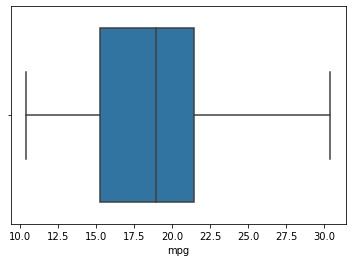

In [73]:
sns.boxplot(x=car['mpg']);

In [164]:
# Independent variables
X=car.loc[:,['wt','drat','hp','qsec','am','gear','carb']]
# Dependent variable
y=car.loc[:,'mpg']

In [75]:
X

,wt,drat,hp,qsec,am,gear,carb
0,2.620,3.90,110,16.46,1,4,4
1,2.875,3.90,110,17.02,1,4,4
2,2.320,3.85,93,18.61,1,4,1
3,3.215,3.08,110,19.44,0,3,1
4,3.440,3.15,175,17.02,0,3,2
5,3.460,2.76,105,20.22,0,3,1
6,3.570,3.21,245,15.84,0,3,4
7,3.190,3.69,62,20.00,0,4,2
8,3.150,3.92,95,22.90,0,4,2
9,3.440,3.92,123,18.30,0,4,4


In [76]:
y

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
18    30.4
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [77]:
car.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [27]:
car['cyl'].unique()

array([6, 4, 8])

### Predictive Modelling

In [165]:
# training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=12)

In [79]:
X_train

,wt,drat,hp,qsec,am,gear,carb
9,3.440,3.92,123,18.30,0,4,4
22,3.435,3.15,150,17.30,0,3,2
8,3.150,3.92,95,22.90,0,4,2
21,3.520,2.76,150,16.87,0,3,2
0,2.620,3.90,110,16.46,1,4,4
10,3.440,3.92,123,18.90,0,4,4
30,3.570,3.54,335,14.60,1,5,8
31,2.780,4.11,109,18.60,1,4,2
27,1.513,3.77,113,16.90,1,5,2
13,3.780,3.07,180,18.00,0,3,3


In [80]:
X_train.shape

(21, 7)

In [81]:
X_test.shape

(9, 7)

In [32]:
X_train

,wt,drat,hp,qsec,am,gear,carb
21,3.520,2.76,150,16.87,0,3,2
8,3.150,3.92,95,22.90,0,4,2
19,1.835,4.22,65,19.90,1,4,1
0,2.620,3.90,110,16.46,1,4,4
10,3.440,3.92,123,18.90,0,4,4
29,2.770,3.62,175,15.50,1,5,6
31,2.780,4.11,109,18.60,1,4,2
30,3.570,3.54,335,14.60,1,5,8
13,3.780,3.07,180,18.00,0,3,3
5,3.460,2.76,105,20.22,0,3,1


In [166]:
# Building the Model
#from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
# training process, using fit function
model_lr.fit(X_train,y_train)

LinearRegression()

In [167]:
# slope
model_lr.coef_

array([-1.78585824, -0.48823307, -0.01635691,  0.69666494,  3.39998561,
        1.33154275, -0.51569731])

In [168]:
# intercept
model_lr.intercept_

12.232165824246248

In [85]:
X_test

,wt,drat,hp,qsec,am,gear,carb
7,3.190,3.69,62,20.00,0,4,2
24,3.845,3.08,175,17.05,0,3,2
20,2.465,3.70,97,20.01,0,3,1
14,5.250,2.93,205,17.98,0,3,4
1,2.875,3.90,110,17.02,1,4,4
23,3.840,3.73,245,15.41,0,3,4
4,3.440,3.15,175,17.02,0,3,2
15,5.424,3.00,215,17.82,0,3,4
25,1.935,4.08,66,18.90,1,4,1


In [169]:
# Predicting the mileage values from X_test
y_pred1=model_lr.predict(X_test)
y_pred1

array([21.94764506, 15.84069542, 26.68745333, 12.53059616, 21.91505945,
       12.2133647 , 16.50889174, 11.91064507, 27.08241011, 18.17539063])

In [88]:
y_test   # Actual mileage data, 30 percent data

7     24.4
24    19.2
20    21.5
14    10.4
1     21.0
23    13.3
4     18.7
15    10.4
25    27.3
Name: mpg, dtype: float64

In [89]:
from sklearn.metrics import mean_squared_error,r2_score

In [92]:
mean_squared_error(y_test,y_pred1)

2.8321028020530346

In [93]:
r2_score(y_test,y_pred1)

0.9109650509344791

In [94]:
22.001984-2.83

19.171984000000002

In [95]:
22.001984+2.83

24.831984

19.171>y<24.83